KNN Regression (Kristin)
1.  Model #1:  set neighbors based on 10
2.  then find optimal # of neighbors 
3.  Model #2:  run model using optimal # of neighbors
3.  Model #3:  run model using optimal # of neighors and changing distance equation to Manhattan (default = euclidean)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



vgsales = pd.read_excel('vgsales_v5.xlsx')

vgsales.head()

# Create dummy variables for | Genre | First_Party | Platform_Type

#dummy variables for Genre
dummy_genre = pd.get_dummies(vgsales.Genre)
dummy_genre

#dummy variables for First Party
dummy_first_party = pd.get_dummies(vgsales.First_Party)
dummy_first_party

#dummy variables for Platform Type
dummy_platform_type = pd.get_dummies(vgsales.Platform_Type)
dummy_platform_type

#Merge dummy frames into one dataset with original vgsales datframe
merged_vgsales = pd.concat([vgsales, dummy_genre, dummy_first_party, dummy_platform_type], axis='columns')







In [2]:
vgsales_df = pd.DataFrame(merged_vgsales)



In [3]:
#drop Rank (it is perfectly correlated with sales because it is based on global sales & is a result of sales
# drop Name (a significant number of dummy variables would have to be created and we are not analyzing the impact of name, but trying to understand impact of genre, platform and region on sales)
#drop Platform (we have created Platform Type and First Parties categories that are more meaningful than Platform)
#drop Publisher (similar reason as Name)

vgsales_df2 = vgsales_df.drop(columns = ["Rank","Name", "Platform", "Publisher","Genre", "First_Party", "Platform_Type","Year_1_Sales", "Year", "Atari","SEGA", "Other","EU_Sales", "Other_Sales","Avg_Annual_Sales","NA_Sales","JP_Sales"])

In [4]:
#Create X, y

X = vgsales_df2.drop(columns = "Global_Sales")
y = vgsales_df2.Global_Sales

In [5]:
#create test/train/validation sets, 80% = train, 10% = test, 10% = validation
#check shape to ensure similar sizes 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(12783, 19)
(12783,)
(1598, 19)
(1598,)
(1598, 19)
(1598,)


KNN

In [6]:
#Libraries for KNN Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import r2_score
%matplotlib inline
import timeit

In [7]:
#Model #1:  KNN set to 10 neighbors

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train,y_train)


y_pred = knn.predict(X_val)
print("mse:",mean_squared_error(y_val, y_pred))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred)))
print("r-squared:", r2_score(y_val, y_pred))
print("training time:", timeit.timeit())

#the poorest performing model among the knn models


mse: 2.1646990043804752
rmse: 1.4712916109257455
r-squared: -0.05058419516958179
training time: 0.007947600000000499


[2.895439467877057, 1.977716035360145, 1.7080330769845837, 1.6531850859792985, 1.5629196523813211, 1.528413059913207, 1.5089585710668763, 1.489046248657127, 1.4834201791038066, 1.4712916109257455, 1.461309197781286, 1.4531413928785875, 1.452271042892775, 1.4453033473700714, 1.4447598298435744, 1.4390845338121079, 1.4337615682325218, 1.4322792858868278, 1.4306086973531948, 1.4303254098841285, 1.4303660619962968, 1.4314762078816448, 1.4292979815651394, 1.428440416257393, 1.4261689996348257, 1.4260621119854013, 1.428421868072566, 1.4255965279407576, 1.4255034069607433, 1.4253409379232689, 1.4237804461654355, 1.419147368746157, 1.416770022305526, 1.4166514283628893, 1.4149808867478801, 1.414785319106694, 1.4188032544433544, 1.4164059212956364, 1.4170306398499106, 1.4169390412977387, 1.4156256499154916, 1.4172632418496762, 1.4155090941745785, 1.4157839603239009, 1.4176458754499612, 1.4192264894101576, 1.4205036255940187, 1.4201078316560645, 1.419122834987425, 1.419271663713214]


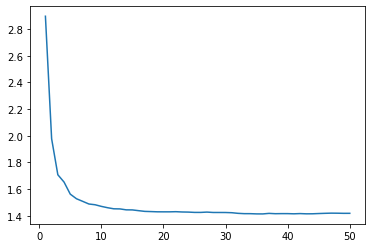

In [8]:
#Find optimal KNN

error = []
for k in range(1,51):
    knn_optimal = KNeighborsRegressor(n_neighbors = k)
    knn_optimal.fit(X_train,y_train)
    y_pred_optimal = knn_optimal.predict(X_val) 
    error.append(sqrt(mean_squared_error(y_val, y_pred_optimal)))

print(error)

plt.plot(range(1,51), error)

#26 is the optimal number of n_neighbors

In [11]:
#Model #2:  n_neighbors = 26

knn2 = KNeighborsRegressor(n_neighbors = 26)
knn2.fit(X_train,y_train)

y_pred2 = knn2.predict(X_val)
print("mse:",mean_squared_error(y_val, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred2)))
print("r-squared:", r2_score(y_val, y_pred2))
print("training time:", timeit.timeit())

#model with 4 neighbors performs better than Model #1 with 10 neighbors

mse: 2.0336531472402632
rmse: 1.4260621119854013
r-squared: 0.013015735386749494
training time: 0.007484300000001554


In [12]:
#Model #3:  change distance equation to Manhattan, keep 26 neighbors

knn3 = KNeighborsRegressor(n_neighbors = 26, p = 1)
knn3.fit(X_train,y_train)

y_pred3 = knn3.predict(X_val)
print("mse:",mean_squared_error(y_val, y_pred3))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred3)))
print("r-squared:", r2_score(y_val, y_pred3))
print("training time:", timeit.timeit())

#This model is weaker than the others

mse: 2.03788161773963
rmse: 1.4275439109672354
r-squared: 0.010963549716877519
training time: 0.008076200000004974
